### Overview

Consider a target function $f : [-1, 1] \rightarrow \mathbb{R}$ given by $f(x) = sin(\pi x)$, with the input probability distribution uniform on $[-1, 1]$. Assume the training set only has two examples ($N = 2$), and the learning algorithm produces the hypothesis that minimizes the mean squared error on the examples.

The hypothesis set $\mathcal{H}$ consists of all hypotheses in the form of $h(x) = ax$. The learning algorithm implements $\mathcal{H}$.

We will find the bias and variance of this model.

In [907]:
%matplotlib inline

import random

import matplotlib.pyplot as plt
import numpy as np

The target function $f(x) = sin(\pi x)$

In [908]:
def f(x):
    return np.sin(np.pi*x)

In [909]:
def generate_data(N):
    '''
    Creates N random training examples from the target function f.
    '''
    data = []
    for i in range(N):
        x = np.random.uniform(-1, 1)
        y = f(x)
        data.append((x, y))
    return data

In [910]:
def linear_regression(data):
    '''
    data - a list of (x, y) training examples
    
    Implements h(x) = ax, returning the list of weights (in this case,
    just contains 'a') of the hypothesis that minimizes the sum of 
    square error.
    '''
    X = np.array([])
    Y = np.array([])
    for x_, y_ in data:
        try:
            X = np.vstack((X, np.array([x_])))
        except ValueError:
            X = np.array([x_])
        try:
            Y = np.vstack((Y, np.array(y_)))
        except ValueError:
            Y = np.array(y_)
    X_dagger = np.linalg.pinv(X)
    w = np.matmul(X_dagger, Y)
    return w

This is an example of the learning algorithm on one random data set.

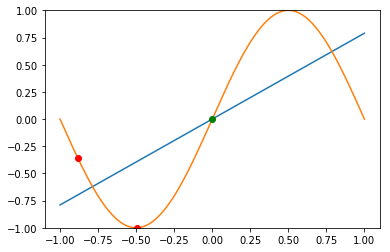

In [911]:
data = generate_data(2)
w = linear_regression(data)

x = np.linspace(-1, 1, 1000)
plt.ylim(-1, 1)

plt.plot(x, w[0, 0]*x)
plt.plot(x, f(x))
plt.plot(0, 0, 'go')
for pointx, pointy in data:
    plt.plot(pointx, pointy, 'ro')

Next, we find out what the "average" hypothesis $\bar{g}(x)$ is, where $\bar{g}(x) = \mathbb{E}_\mathcal{D}\big[g^{(\mathcal{D})}(x)\big]$. This represents the hypothesis we are expected to get after running the learning algorithm across a large number of data sets.

To do so, we simulate the learning algorithm on a large number of different data sets and average all of the parameters obtained by the algorithm. Specifically, we are computing $\bar{a}$ in $\bar{g}(x) = \bar{a}x$.

In [912]:
average = 0
for i in range(1000):
    data = generate_data(2)
    w = linear_regression(data)
    average += w[0,0]
average /= 1000
average

1.440892378141992

We now compute the bias:

bias = $\mathbb{E}_x\big[(\bar{g}(x) - f(x))^2\big]$

We are assuming the distrubution of the $x$ values is uniform, so we just integrate $bias(x)$ with respect to x and divide by the length of the interval:

$
\begin{align}
&= \frac12\int_{-1}^1(\bar{g}(x) - f(x))^2dx\\
&= \frac12\int_{-1}^1(\bar{a}x - sin(\pi x))^2dx
\end{align}
$

Solving the integral, the bias is around 0.3.

Note: $\hat{a}$, and therefore the bias, vary depending on $N$. Bias seems to decrease with larger $N$. Is bias not a constant property of $\mathcal{H}$?

variance = $\mathbb{E}_x\big[\mathbb{E}_\mathcal{D}\big[(g^\mathcal{D}(x)-\bar{g}(x))^2\big]\big] = \mathbb{E}_x\big[var(x)\big]$

$
\begin{gather}
g^\mathcal{D}(x) = \hat{a}_\mathcal{D}x
\\
\bar{g}(x) = \bar{a}x
\end{gather}
$

$
\begin{align}
var(x) &= \mathbb{E}_\mathcal{D}\big[(\hat{a}x - \bar{a}x)^2\big]\\
&= \frac{1}{k}\sum_{\mathcal{D}}(\hat{a}^2x-\bar{a}x)^2\\
&= \frac1k\big(\sum_{\mathcal{D}}\hat{a}^2x^2+\sum_{\mathcal{D}}\bar{a}^2x^2-\sum_{\mathcal{D}}2\hat{a}\bar{a}x^2\big)\\
&= \bar{a}^2x^2 + \frac{x^2}{k}\big(\sum_{\mathcal{D}}\hat{a}^2 - 2\bar{a}\sum_{\mathcal{D}}\hat{a}\big)\\
&= \big(\bar{a}^2 + \frac1k\big(\sum_{\mathcal{D}}\hat{a}^2 - 2\bar{a}\sum_{\mathcal{D}}\hat{a}\big)\big)x^2
\end{align}
$

Computationally, we can generate $k$ different data sets and find $\sum_{\mathcal{D}}\hat{a}^2$ and $\sum_{\mathcal{D}}\hat{a}$. $\bar{a}$ is a constant that is already determined, and $x$ for the purposes of computing $var(x)$ is a constant. Once we have $var(x)$, we can integrate with respect to $x$ to get the variance.

variance = $\frac12\int_{-1}^1var(x)dx$ 

$
\begin{align}
&= \frac{1}{2}\int_{-1}^1\big(\bar{a}^2 + \frac1k\big(\sum_{\mathcal{D}}\hat{a}^2 - 2\bar{a}\sum_{\mathcal{D}}\hat{a}\big)\big)x^2dx\\
&= \frac{1}{2}\big(\bar{a}^2 + \frac1k\big(\sum_{\mathcal{D}}\hat{a}^2 - 2\bar{a}\sum_{\mathcal{D}}\hat{a}\big)\big)\int_{-1}^1x^2dx\\
&= \frac{1}{3}\big(\bar{a}^2 + \frac1k\big(\sum_{\mathcal{D}}\hat{a}^2 - 2\bar{a}\sum_{\mathcal{D}}\hat{a}\big)\big)
\end{align}
$

In [922]:
sum_of_a_hat_squared = 0
sum_of_a_hat = 0
k = 1000
for i in range(k):
    data = generate_data(2)
    w = linear_regression(data)
    sum_of_a_hat += w[0,0]
    sum_of_a_hat_squared += w[0,0]**2
sum_of_a_hat, sum_of_a_hat_squared

(1480.0983473132871, 2900.0835154865454)

Thus, variance is about 0.2 

### Conclusion

The $E_{out}$ is the sum of the bias and variance, which is about 0.5. 

We have calculated that for a model $h(x) = b$, the $E_{out}$ is about 0.75 (bias = 0.5, variance = 0.25), and for a model $h(x) = ax + b$, $E_{out}$ is about 1.9 (bias = 0.21, variance = 1.69). Thus, among the three models, $h(x) = ax$ is the best, given only $N = 2$.
